In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
df = pd.read_csv("CO2 Emission Canada.csv")

# take a look at the dataset
df.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2024,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
1,2024,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6
2,2024,Acura,Integra Type S,Full-size,2.0,4,M6,Z,11.1,8.3,9.9,29,230,5,6
3,2024,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
4,2024,Acura,MDX SH-AWD Type S,Sport utility vehicle: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5


In [5]:
# Drop unnecessary columns
df.drop(columns=['Model year', 'Make', 'Model', 'Vehicle class', 'CO2 rating', 'Smog rating'], inplace=True)

# Rename colums
df = df.rename(columns={
    'Engine size (L)': 'ENGINESIZE',
    'Cylinders': 'CYLINDERS',
    'City (L/100 km)': 'CITY',
    'Highway (L/100 km)': 'HIGHWAY',
    'Combined (L/100 km)': 'COMBINED',
    'Combined (mpg)': 'COMBINED_MPG',
    'Transmission': 'TRANSMISSION',
    'Fuel type': 'FUELTYPE',
    'CO2 emissions (g/km)': 'CO2EMISSIONS'})

In [6]:
# Perform one-hot encoding
df = pd.get_dummies(df, columns=['TRANSMISSION', 'FUELTYPE'])

bool_columns = df.select_dtypes(include=['bool']).columns

# Convert only boolean columns to integers (0/1)
df[bool_columns] = df[bool_columns].astype(int)

In [7]:
X = df.drop(columns=['CO2EMISSIONS'])
y = df['CO2EMISSIONS']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

X_train.head()

,ENGINESIZE,CYLINDERS,CITY,HIGHWAY,COMBINED,COMBINED_MPG,TRANSMISSION_A10,TRANSMISSION_A6,TRANSMISSION_A8,TRANSMISSION_A9,...,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUELTYPE_D,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
289,5.3,8,14.8,11.7,13.4,21,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
328,1.5,4,8.7,6.4,7.7,37,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
394,3.6,6,13.9,10.2,12.2,23,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
321,1.5,4,7.7,6.3,7.1,40,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
326,2.0,4,7.7,6.0,6.9,41,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


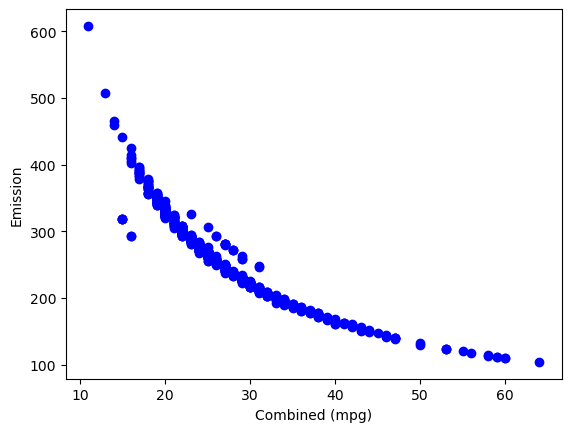

In [8]:
# Plot COMBINED_MPG against CO2EMISSIONS
plt.scatter(X.COMBINED_MPG, y,  color='blue')
plt.xlabel("Combined (mpg)")
plt.ylabel("Emission")
plt.show()

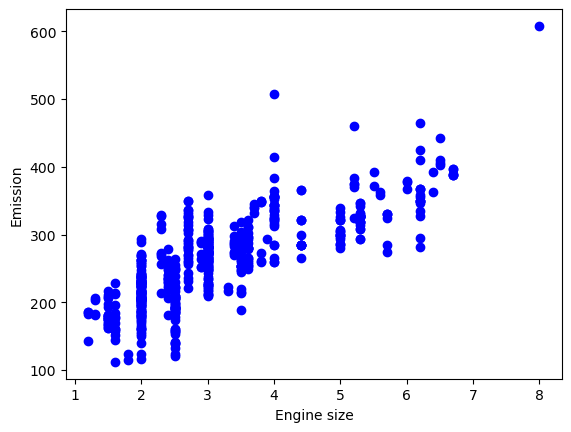

In [9]:
# Plot COMBINED_MPG against CO2EMISSIONS
plt.scatter(X_train.ENGINESIZE, y_train,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [10]:
from sklearn import linear_model

# Create model
regr = linear_model.LinearRegression()
x = np.asanyarray(X_train)
y = np.asanyarray(y_train)
regr.fit (x, y)

LinearRegression()

In [11]:
# View coeffiecients
coefficients = [coefficient for coefficient in zip(X.columns, regr.coef_)]
coefficients

[('ENGINESIZE', 0.2142495733008918),
 ('CYLINDERS', -0.25958558619033295),
 ('CITY', 7.458170151794256),
 ('HIGHWAY', 6.041993452060309),
 ('COMBINED', 9.773958461667188),
 ('COMBINED_MPG', -0.08675281105184206),
 ('TRANSMISSION_A10', -0.3075760088528023),
 ('TRANSMISSION_A6', -2.2086387628871034),
 ('TRANSMISSION_A8', -0.14525742695624316),
 ('TRANSMISSION_A9', 0.754773813150051),
 ('TRANSMISSION_AM6', 1.2425292115083866),
 ('TRANSMISSION_AM7', 0.18917311097179182),
 ('TRANSMISSION_AM8', 1.2514946651551457),
 ('TRANSMISSION_AS10', 0.23248923855593717),
 ('TRANSMISSION_AS5', -2.4044152541915045),
 ('TRANSMISSION_AS6', 0.1350997016969928),
 ('TRANSMISSION_AS7', 2.020446237545167),
 ('TRANSMISSION_AS8', 0.09787810658211818),
 ('TRANSMISSION_AS9', 0.8663140670415008),
 ('TRANSMISSION_AV', 0.4374482873219997),
 ('TRANSMISSION_AV1', 0.4289054791999948),
 ('TRANSMISSION_AV10', -0.4305541352259269),
 ('TRANSMISSION_AV6', -0.5859589512399755),
 ('TRANSMISSION_AV7', -0.03800315524525544),
 ('TR

In [12]:
# Make predictions
y_hat= regr.predict(X_test)
x = np.asanyarray(X_test)
y = np.asanyarray(y_test)

# Evaluate model
mse = np.mean((y_hat - y) ** 2)
print(f"Mean Squared Error (MSE) : {mse.round(2)}")

print('Variance score: %.2f' % regr.score(x, y))

Mean Squared Error (MSE) : 2.71
Variance score: 1.00


c:\Users\HP USER\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
